In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# display stat. of all non-numeric variables
titanic.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [7]:
# check missing values for each variable
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

([<matplotlib.axis.XTick at 0x186e984b0a0>,
 [Text(0, 0, 'survived'),
  Text(1, 0, 'pclass'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'age'),
  Text(4, 0, 'sibsp'),
  Text(5, 0, 'parch'),
  Text(6, 0, 'fare'),
  Text(7, 0, 'embarked'),
  Text(8, 0, 'class'),
  Text(9, 0, 'who'),
  Text(10, 0, 'adult_male'),
  Text(11, 0, 'deck'),
  Text(12, 0, 'embark_town'),
  Text(13, 0, 'alive'),
  Text(14, 0, 'alone')])

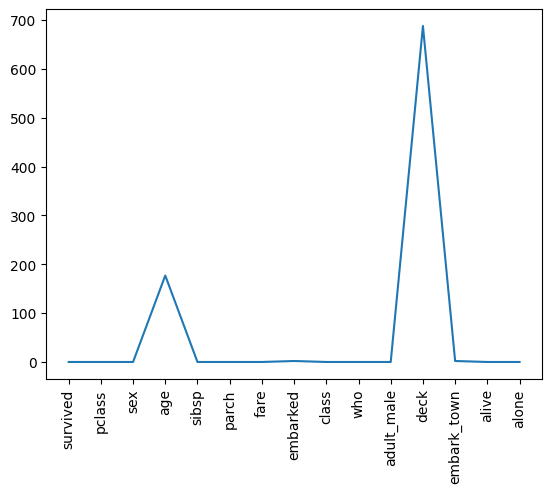

In [8]:
# plot missing values for each variable
titanic.isnull().sum().plot()
columns = titanic.columns
plt.xticks(np.arange(len(columns)), columns, rotation='vertical')

In [9]:
titanic[titanic['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [10]:
# fill missing values
titanic['embark_town'] = titanic['embark_town'].fillna(method='ffill')
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [11]:
# drop unused columns
titanic.drop(columns=['embarked','deck','adult_male','who','alive','alone'], inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town
0,0,3,male,22.0,1,0,7.2500,Third,Southampton
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Third,Southampton
3,1,1,female,35.0,1,0,53.1000,First,Southampton
4,0,3,male,35.0,0,0,8.0500,Third,Southampton


In [12]:
# 檢查 class 是否平衡? 
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# check category unique values
print(titanic['pclass'].nunique())
titanic['pclass'].unique()

3


array([3, 1, 2], dtype=int64)

<Axes: xlabel='survived', ylabel='count'>

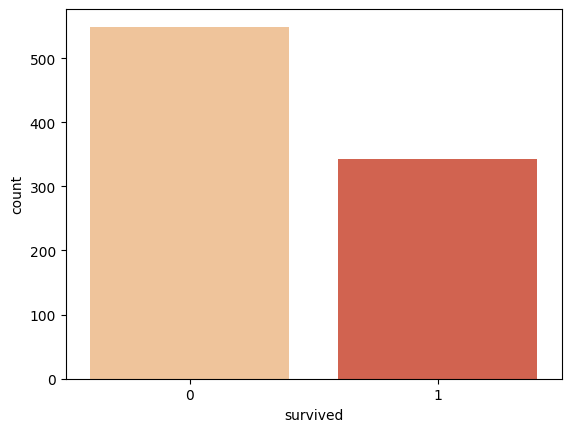

In [14]:
sns.countplot(x='survived',data=titanic, palette="OrRd")

<Axes: xlabel='embark_town', ylabel='count'>

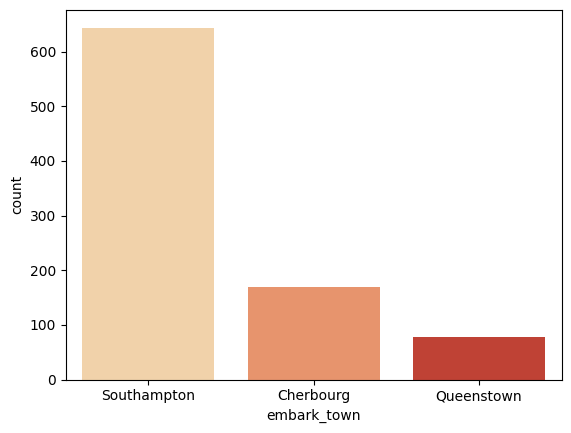

In [15]:
sns.countplot(x='embark_town',data=titanic, palette="OrRd")

             survived
embark_town          
Cherbourg    0.556213
Queenstown   0.397436
Southampton  0.336957


(array([0, 1, 2]),
 [Text(0, 0, 'Cherbourg'),
  Text(1, 0, 'Queenstown'),
  Text(2, 0, 'Southampton')])

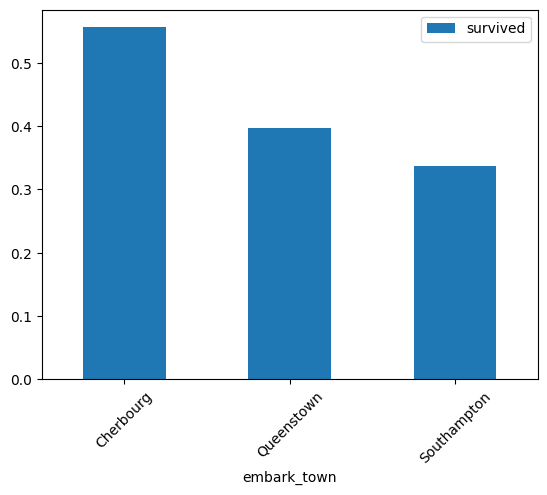

In [16]:
# Analyze the correlation between embark_town and survived
x=titanic[['embark_town', 'survived']].groupby(['embark_town'], as_index=True).mean().sort_values(by='survived', ascending=False)
print(x)
x.plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

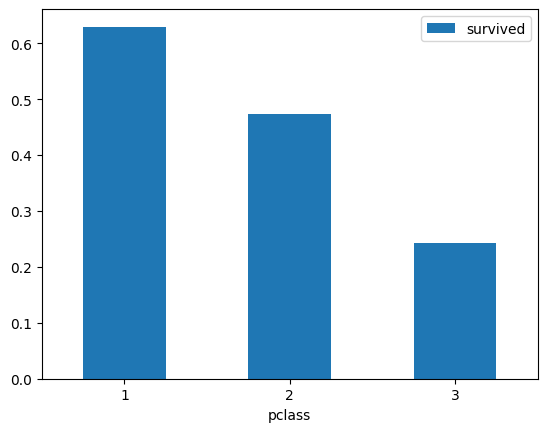

In [17]:
# Analyze the correlation between pclass and survived
x=titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().sort_values(by='survived', ascending=False)
x.plot(kind='bar')
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

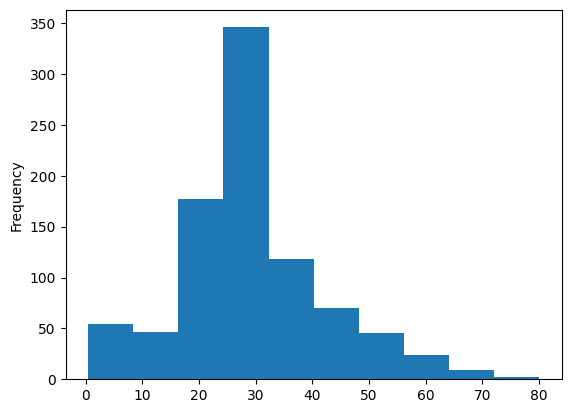

In [18]:
# age histogram
titanic['age'].plot.hist(bins = 10)

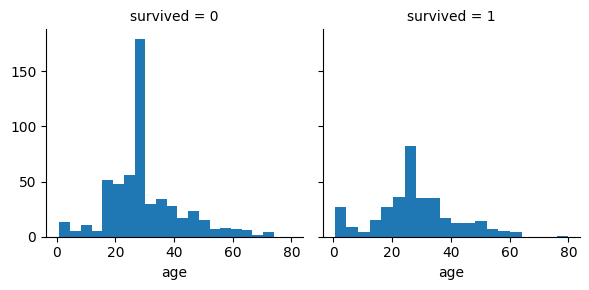

In [19]:
# draw histogram for age vs. Survived
g = sns.FacetGrid(titanic, col='survived')
g.map(plt.hist, 'age', bins=20)

<Axes: xlabel='survived', ylabel='age'>

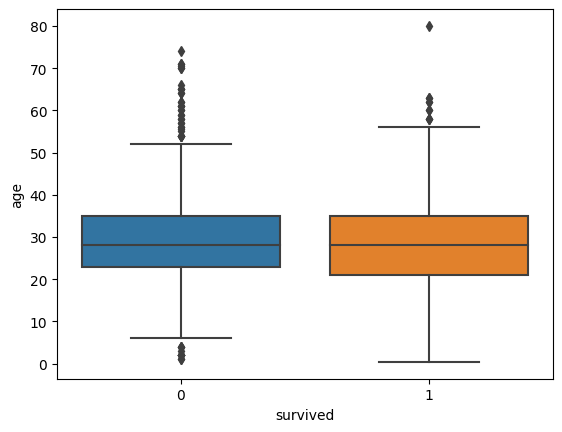

In [20]:
sns.boxplot(data=titanic, x='survived', y='age')

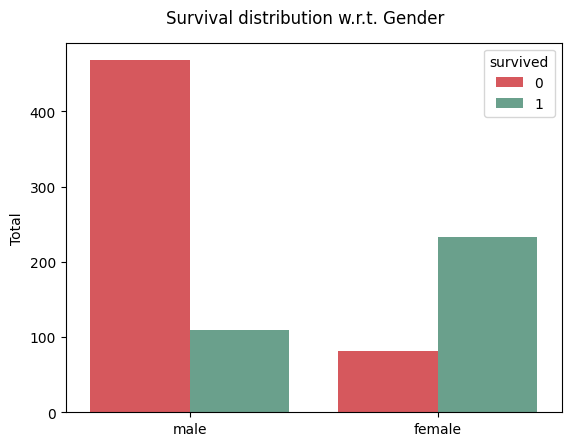

In [21]:
# draw histogram for Sex vs. Survived
fig = plt.figure()
ax = sns.countplot(x='sex', 
                   hue='survived', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=titanic)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Survival distribution w.r.t. Gender", y=0.95);

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town
0,0,3,male,22.0,1,0,7.2500,Third,Southampton
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Third,Southampton
3,1,1,female,35.0,1,0,53.1000,First,Southampton
4,0,3,male,35.0,0,0,8.0500,Third,Southampton


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB


In [24]:
# convert categorical vaiable to int
titanic['sex'] = titanic['sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [25]:
# convert binomials and categoricals to encoded labels
# ** 缺點：不知道對應值，要將模型存起來，預測時要用載入模型，再 transform
from sklearn.preprocessing import LabelEncoder
titanic_encoded = titanic.copy() # keep the original, as we ll need both in different scenarios
for label in ['class', 'embark_town']:
    titanic_encoded[label] = LabelEncoder().fit_transform(titanic_encoded[label])

titanic_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town
0,0,3,0,22.0,1,0,7.2500,2,2
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,2,2
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,2,2


C:\Users\mikec\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mikec\anaconda3\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


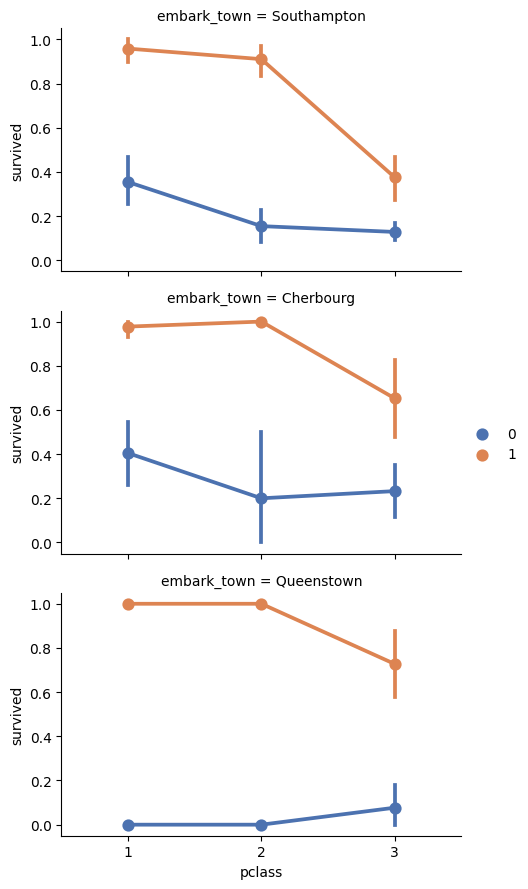

In [27]:
# 多維度分析
grid = sns.FacetGrid(titanic, row='embark_town', aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

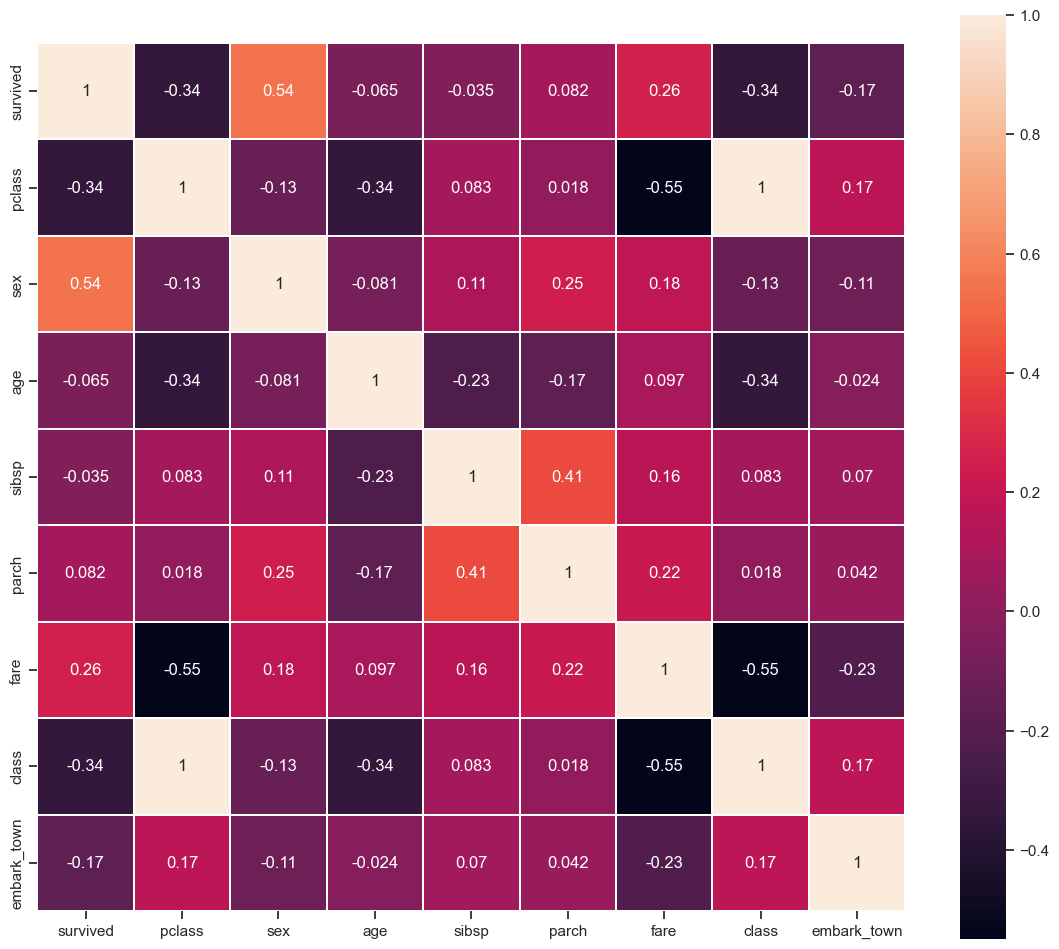

In [28]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(titanic_encoded.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

In [29]:
titanic_encoded.drop(columns=['class'], inplace=True)

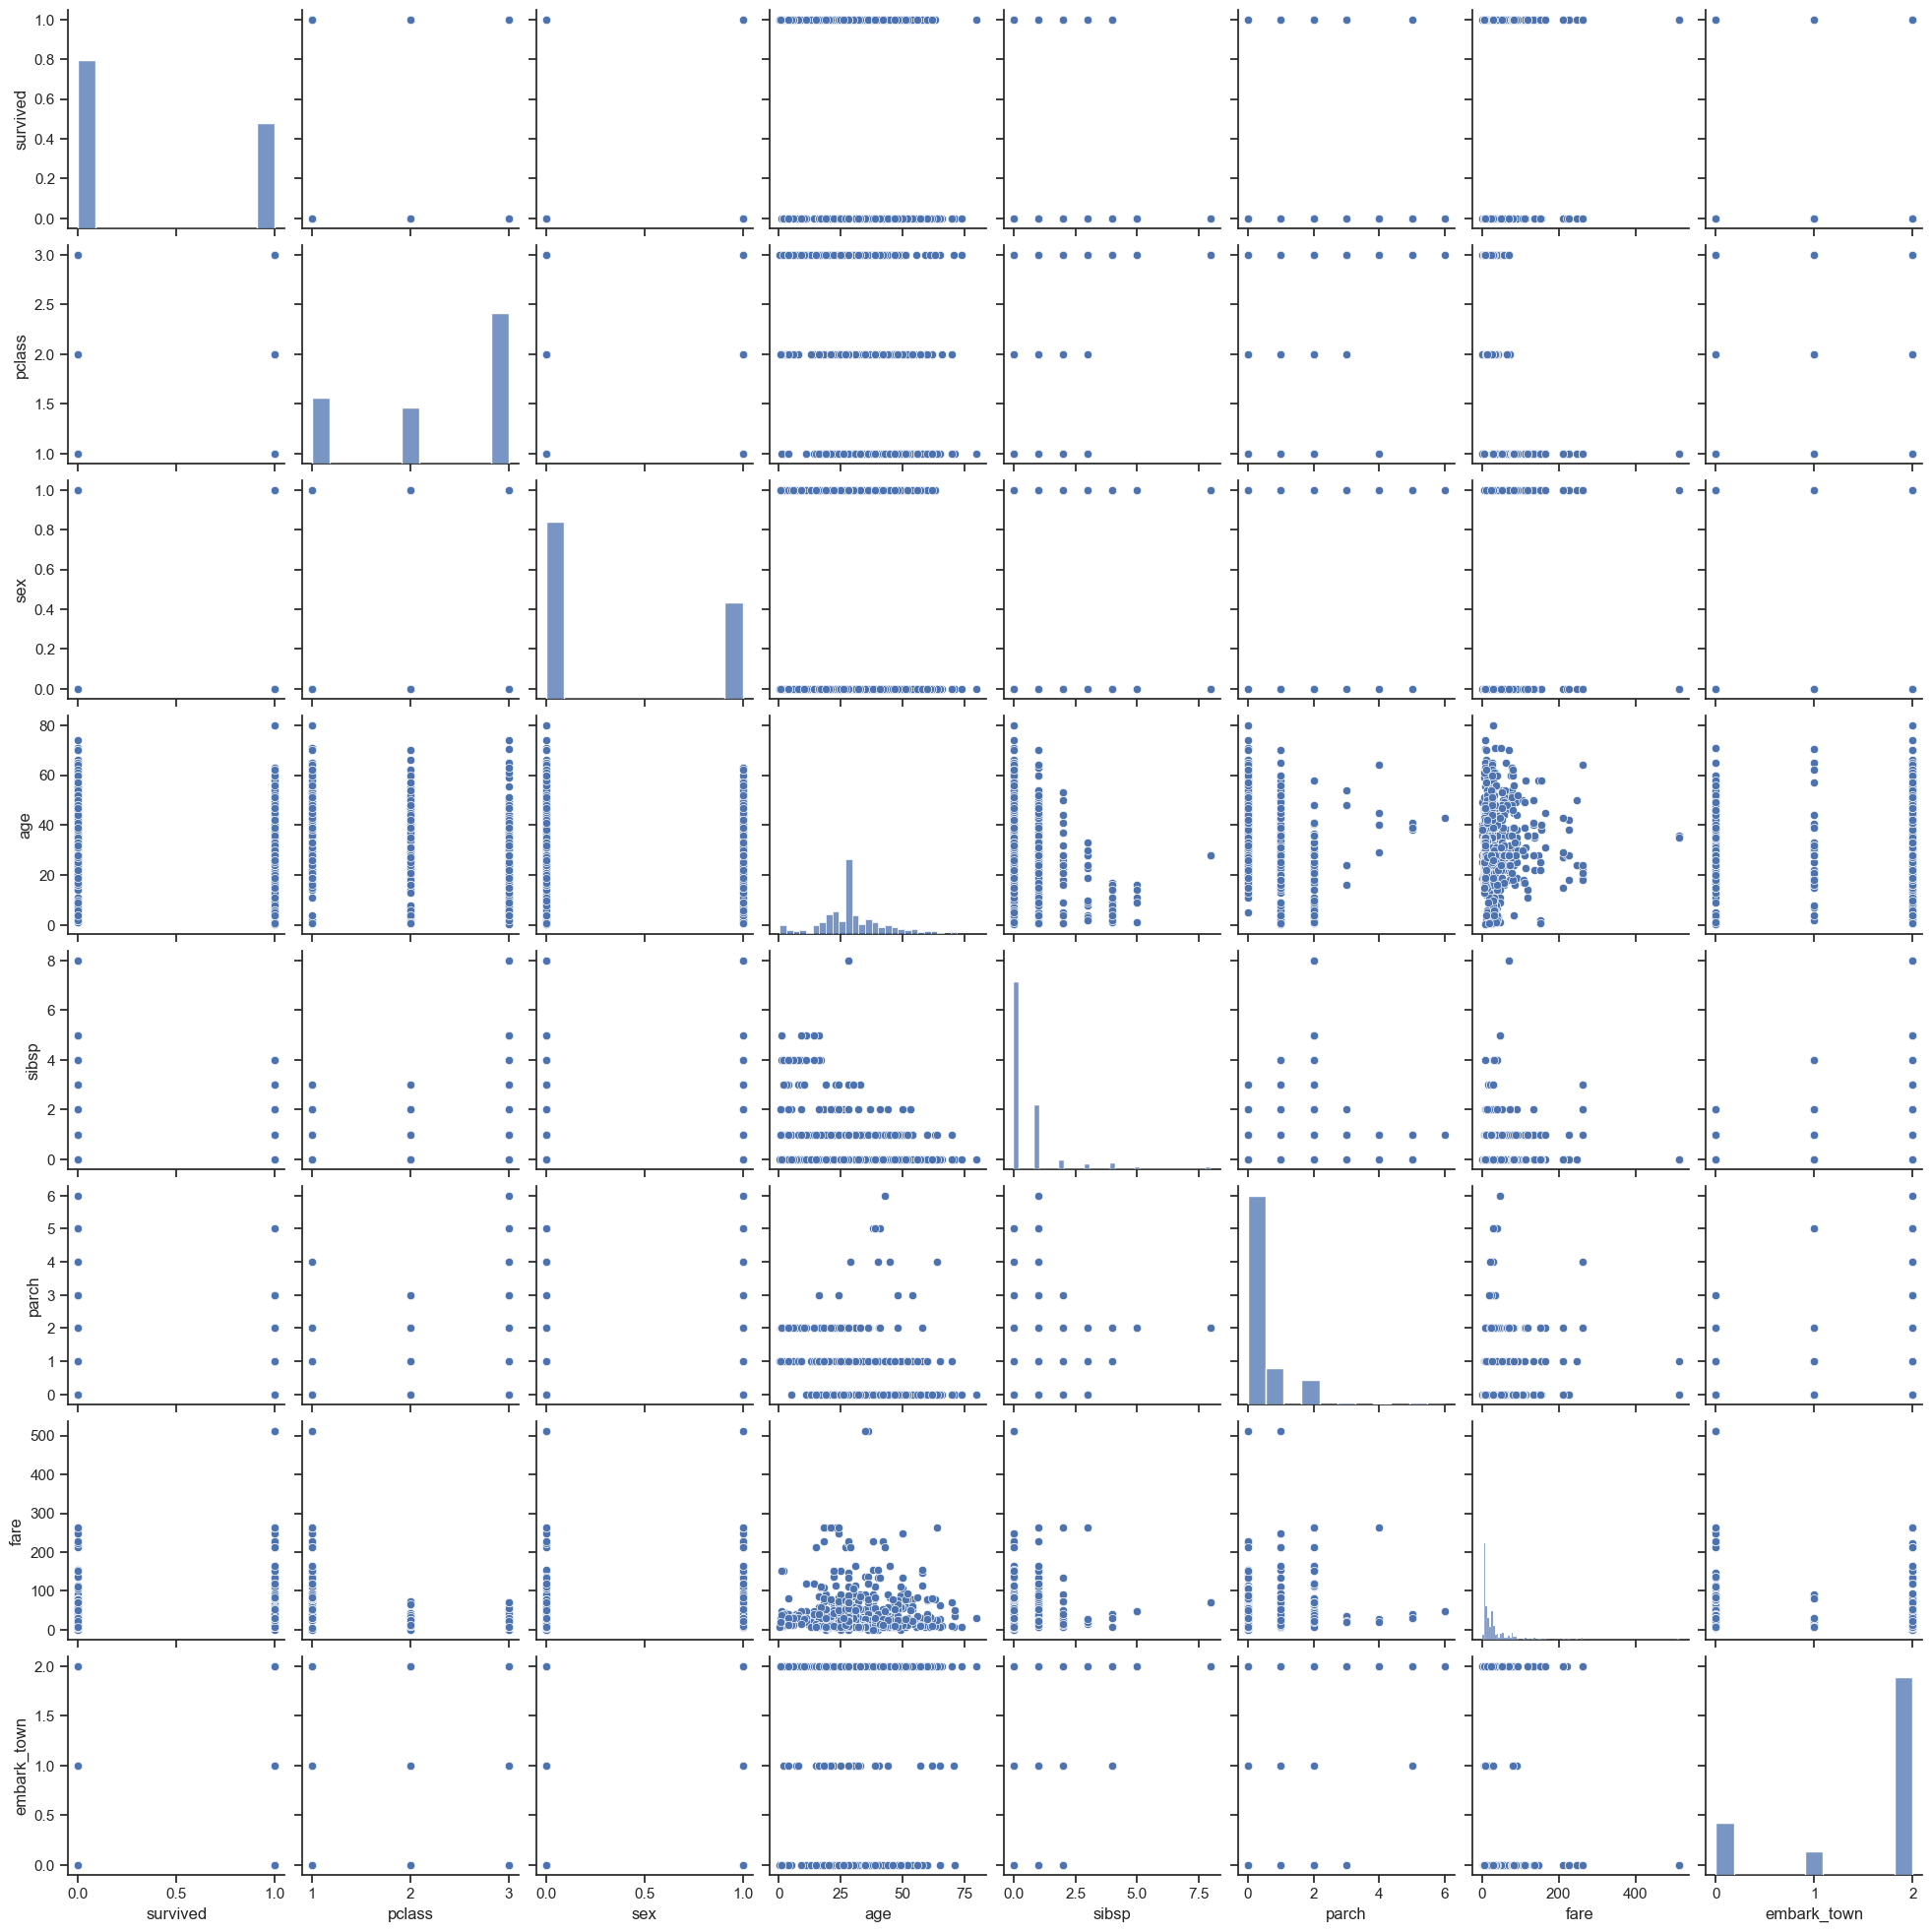

In [30]:
sns.pairplot(titanic_encoded)

In [31]:
# age 分組
bins = np.linspace(0,100,21)
titanic_encoded['age']=pd.cut(titanic_encoded['age'], bins, labels=np.linspace(0,100,20, endpoint=False))
titanic_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,0,20.0,1,0,7.2500,2
1,1,1,1,35.0,1,0,71.2833,0
2,1,3,1,25.0,0,0,7.9250,2
3,1,1,1,30.0,1,0,53.1000,2
4,0,3,0,30.0,0,0,8.0500,2


In [32]:
# 標準化（Standardization）
from sklearn.preprocessing import StandardScaler
clf= StandardScaler()
#titanic_encoded['fare']= clf.fit_transform(np.array(titanic_encoded['fare']).reshape((titanic_encoded.shape[0], 1)))
clf.fit(np.array(titanic_encoded['fare']).reshape((titanic_encoded.shape[0], 1)))
titanic_encoded['fare']= clf.transform(np.array(titanic_encoded['fare']).reshape((titanic_encoded.shape[0], 1)))
titanic_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,0,20.0,1,0,-0.502445,2
1,1,1,1,35.0,1,0,0.786845,0
2,1,3,1,25.0,0,0,-0.488854,2
3,1,1,1,30.0,1,0,0.420730,2
4,0,3,0,30.0,0,0,-0.486337,2


In [33]:
# split into train and test data
from sklearn.model_selection import train_test_split
Y=titanic_encoded['survived']
del titanic_encoded['survived']
X_train, X_test, Y_train, Y_test= train_test_split(titanic_encoded, Y, test_size=0.2)

In [34]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.48

In [35]:
round(logreg.score(X_test, Y_test) * 100, 2)

75.98

In [36]:
from sklearn.metrics import accuracy_score
print('accuracy={:.2f}\n'.format(accuracy_score(Y_test, Y_pred)*100))

accuracy=75.98



In [37]:
# SVM
svc  = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.12

In [38]:
print('accuracy={:.2f}\n'.format(accuracy_score(Y_test, Y_pred)*100))

accuracy=75.42



In [39]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.83

In [40]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.65

In [41]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.22

In [42]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.22

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'kNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.22
5,Decision Tree,95.22
1,kNN,84.83
2,Logistic Regression,80.48
4,Naive Bayes,78.65
0,Support Vector Machines,68.12


In [44]:
# save model, 序列化(Serialization)
import pickle
model_file_name='model.pickle'
with open(model_file_name, 'wb') as f:
    pickle.dump(random_forest, f)


In [45]:
# save model
import pickle
fare_file_name='fare.pickle'
with open(fare_file_name, 'wb') as f:
    pickle.dump(clf, f)

In [46]:
!pip install pandas-profiling

     -------------------------------------- 62.8/62.8 kB 848.1 kB/s eta 0:00:00
  Using cached pandas-1.5.3-cp39-cp39-win_amd64.whl (10.9 MB)
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 8.0 MB/s eta 0:00:00
  Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.3
    Uninstalling urllib3-2.0.3:
      Successfully uninstalled urllib3-2.0.3
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] 存取被拒。: 'C:\\Users\\mikec\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [47]:
from pandas_profiling import ProfileReport
profile = ProfileReport(titanic)
profile

C:\WINDOWS\Temp\ipykernel_10348\3137978372.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
profile.to_file('ouput.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]